Time taken by Rejection Method to generate 10,000 random numbers: 0.010982 seconds


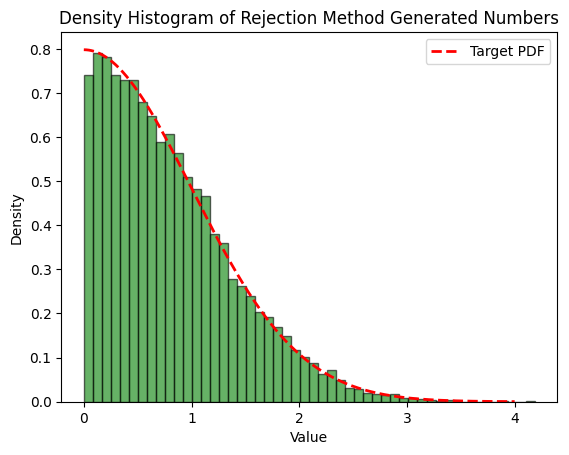

In [17]:
import numpy as np

import matplotlib.pyplot as plt
import time

def target_distribution(x):
    return (2 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

def proposal_distribution(size):
    return np.abs(np.random.randn(size))   #normal distributed random numbers are taken  

def rejection_method(size):
    samples = []
    while len(samples) < size:
        x = proposal_distribution(size - len(samples))
        # Generate uniform random numbers for acceptance criteria
        u = np.random.rand(size - len(samples))           # Uniform

        # Apply the acceptance-rejection criteria
        accept = u < target_distribution(x) / ((2 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2))
        samples.extend(x[accept])
    return np.array(samples[:size])

# Measure the time taken to generate 10,000 random numbers using the Rejection Method
num_samples = 10000
start_time = time.time()
random_numbers_rejection = rejection_method(num_samples)
end_time = time.time()
rejection_time = end_time - start_time
print(f"Time taken by Rejection Method to generate 10,000 random numbers: {rejection_time:.6f} seconds")

# Plot the density histogram
plt.hist(random_numbers_rejection, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the target PDF
x = np.linspace(0, 4, 1000)
target_pdf = target_distribution(x)
plt.plot(x, target_pdf, 'r--', linewidth=2, label='Target PDF')

# Add titles and labels
plt.title('Density Histogram of Rejection Method Generated Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


### 